<a href="https://colab.research.google.com/github/Rogerio-mack/PythonEE/blob/main/NonLinearRegression_TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import statsmodels.formula.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# df = pd.read_csv('https://github.com/Rogerio-mack/Ciencia-de-Dados-e-Aprendizado-de-Maquina/raw/main/data/guinearice.csv', parse_dates=['date'], index_col='date')
df = pd.read_csv('https://github.com/Rogerio-mack/Ciencia-de-Dados-e-Aprendizado-de-Maquina/raw/main/data/AirPassengers.csv', parse_dates=['date'], index_col='date')
df.head()

,value
date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


# Baseline

Um modelo de regressão linear não é um modelo ideal... mas pode fornecer um **primeiro modelo** base para modelos melhores.

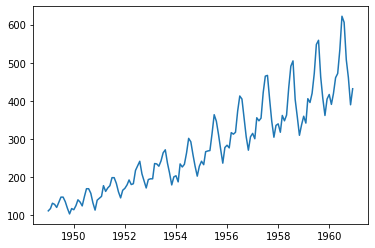

In [3]:
plt.plot(df['value'])
plt.show()

# Regressão Linear

A regressão linear consiste em encontrarmos os coeficientes da reta que melhor aproxima o conjunto de pontos da série...

$$ \hat y = a_0 + a_1 x$$

e 

$$ \min \text{ERRO}(y, \hat y) $$

onde $y$ são os valores da série e $x$, a escala de *tempo*. O problema é que **não podemos empregar datas como variáveis da função!** (imagine, o que é 0.5 * 1964/05/26???). Assim vamos substituir a escala de tempo por valores de *intervalos de tempo*:



In [4]:
np.arange(5)

array([0, 1, 2, 3, 4])

In [5]:
df['time'] = np.arange(len(df))
df.head()

,value,time
date,,
1949-01-01,112,0
1949-02-01,118,1
1949-03-01,132,2
1949-04-01,129,3
1949-05-01,121,4


O resultado é o mesmo, mas nossas variáveis do eixo $x$ são agora valores numéricos e podemos aplicar uma função e fazer cálculos com esses valores.

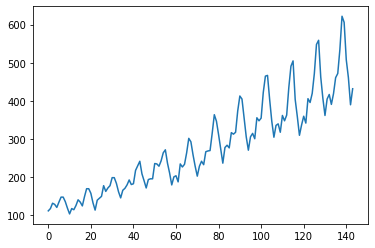

In [6]:
plt.plot(df['time'],df['value'])
plt.show()

Com não temos empregaremos o índice de Série Temporal é mais simples excluírmos os índices para trabalharmos somente com os valores $y$, `value`, e $x$, `time`.  

In [7]:
df = df.reset_index()
df.head()

,date,value,time
0,1949-01-01,112,0
1,1949-02-01,118,1
2,1949-03-01,132,2
3,1949-04-01,129,3
4,1949-05-01,121,4


# Esquema de Aplicação de Um Regressor

O esquema abaixo pode ser aplicado para qualquer conjunto de entradas e saídas para ajustar uma reta ao conjunto de pontos.

In [8]:
from sklearn.linear_model import LinearRegression

# Training data
X = df[['time']]  # features
y = df['value']  # target

# Train the model
model = LinearRegression()
model.fit(X, y)

# Store the fitted values as a time series with the same time index as
# the training data
y_pred = pd.Series(model.predict(X), index=X.index)

# Valores Previstos

Aqui os valores previstos e a série original.

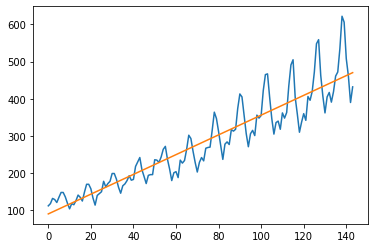

In [9]:
plt.plot(df['time'], df['value'])
plt.plot(df['time'], y_pred)
plt.show()

# Regressão Não Linear

Um modelo mais elaborado pode ser aplicado empregando regressores não lineares.

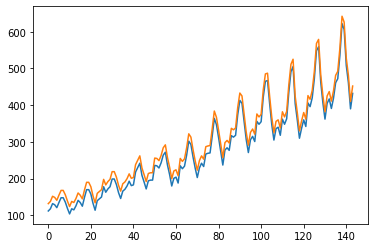

In [17]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost.sklearn import XGBRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import SGDRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression

# Training data
X = df[['time']]  # features
y = df['value']  # target

# Train the model
model = DecisionTreeRegressor()
model.fit(X, y)

# Store the fitted values as a time series with the same time index as
# the training data
y_pred = pd.Series(model.predict(X), index=X.index)

plt.plot(df['time'], y_pred)
plt.plot(df['time'], df['value']+20)
plt.show()



A precisão acima é tão boa que tive que somar 20 aos valores da série para que você pudesse ver a linha da previsão e dos valores originais.

# Regressão Múltipla

O que os modelos de regressão acima, seja o linear ou o não linear, fazem é criar uma função:

$$ f: x \rightarrow y $$

que melhor aproxima um conjunto de pontos $(x_i, y_i)$ fornecido. Chamamos  esse conjunto de *conjunto de treinamento*. O mesmo pode ser aplicado para quando temos mais de uma variável *preditora* (ou *dependente*) $x$:

$$ (\mathbf{X}_i, y_i) \space \space \text{   queremos encontrar,  } \space \space f: \mathbf{X} \rightarrow y $$

## Exemplo

Suponha que as emissões de CO2 de uma máquina sejam o resultado da velocidade de giro e potência empregadas:



In [53]:
v = ( np.linspace(0,10,100) )**3 + 5*( np.linspace(0,10,100) )**2 + 10
p = np.linspace(0,2000,100) + np.random.sample(100)*2
CO2 = np.abs( np.cos(v*2*np.pi) ) + np.log(p)*10

df = pd.DataFrame()
df['v'] = v
df['p'] = p
df['CO2'] = CO2 

df.head()

,v,p,CO2
0,10.000000,1.626254,5.862794
1,10.052046,20.484393,31.143639
2,10.212306,41.745658,37.550587
3,10.486963,62.564681,42.358656
4,10.882202,82.307455,44.842988


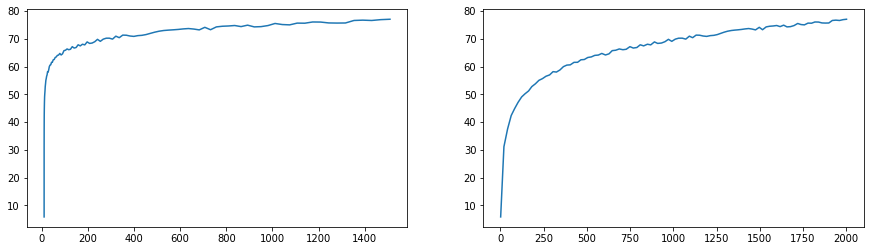

In [54]:
fig = plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
plt.plot(df.v, df.CO2)

plt.subplot(1,2,2)
plt.plot(df.p, df.CO2)

plt.show()

## Esquema de Regressão Múltipla

Os mesmos esquemas anteriores de Regressão podem ser agora aplicados apenas adicionando-se mais variáveis preditoras. 

Mas antes veja o resultado com uma única variável... você verá que adicionar variáveis ao modelo melhora o resultado de previsão. Isso nem sempre ocorre e depende de uma série de fatores, mas a ideia é que poucos problemas apresentam uma única variável preditora. 

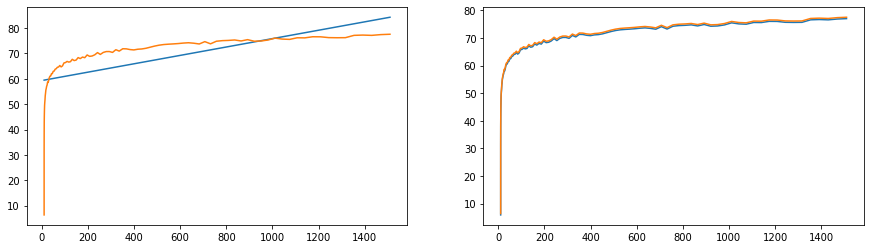

In [55]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost.sklearn import XGBRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import SGDRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression

# Training data
X = df[['v']]  # features
y = df['CO2']  # target

# Train the model
model = LinearRegression()
model.fit(X, y)

# Store the fitted values as a time series with the same time index as
# the training data
y_pred = pd.Series(model.predict(X), index=X.index)

fig = plt.figure(figsize=(15,4))

plt.subplot(1,2,1)

plt.plot(df['v'], y_pred)
plt.plot(df['v'], df['CO2']+0.5)

# Train the model
model = DecisionTreeRegressor()
model.fit(X, y)

# Store the fitted values as a time series with the same time index as
# the training data
y_pred = pd.Series(model.predict(X), index=X.index)

plt.subplot(1,2,2)

plt.plot(df['v'], y_pred)
plt.plot(df['v'], df['CO2']+0.5)
plt.show()



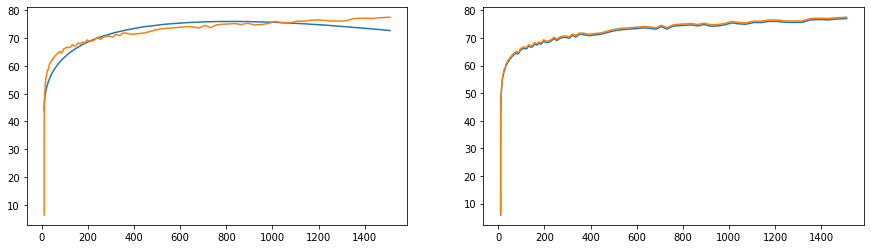

In [56]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost.sklearn import XGBRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import SGDRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression

# Training data
X = df[['v','p']]  # features
y = df['CO2']  # target

# Train the model
model = LinearRegression()
model.fit(X, y)

# Store the fitted values as a time series with the same time index as
# the training data
y_pred = pd.Series(model.predict(X), index=X.index)

fig = plt.figure(figsize=(15,4))

plt.subplot(1,2,1)

plt.plot(df['v'], y_pred)
plt.plot(df['v'], df['CO2']+0.5)

# Train the model
model = DecisionTreeRegressor()
model.fit(X, y)

# Store the fitted values as a time series with the same time index as
# the training data
y_pred = pd.Series(model.predict(X), index=X.index)

plt.subplot(1,2,2)

plt.plot(df['v'], y_pred)
plt.plot(df['v'], df['CO2']+0.5)
plt.show()

